<a href="https://www.kaggle.com/code/sukronchafidhi/dicoding-mlterapan-project2-recommendationsystem?scriptVersionId=138405082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Projek Akhir Machine Learning - Sukron Chafidhi

![animes](https://res.cloudinary.com/da0hsihog/image/upload/v1690711687/Portofolio/animes_wtf6kl.jpg)

Anime adalah istilah Jepang untuk segala jenis animasi, tak peduli dari negara mana asalnya. Industri anime tumbuh pesat dari tahun 2013 hingga 2018, dengan pasar rata-rata sekitar 2 triliun yen. Pada tahun 2018, pasar luar negeri mencapai lebih dari 1 triliun yen, atau sekitar 46,3% dari total pasar animasi Jepang. Pertumbuhan ini menghasilkan banyak karya anime baru untuk dinikmati pengguna. Namun, keberagaman anime bisa membuat pengguna kesulitan mencari anime sesuai preferensi mereka. Sistem rekomendasi adalah solusi untuk menyandingkan pengguna dengan anime yang cocok secara otomatis, tanpa mencari manual.

List Content:
* [Project Overview](http://)
* [Business Understanding](http://)
* [Data Understanding](http://)
* [Exploratory Data Analysis]()
    * [Univariate]()
    * [Multivariate]()
* [Data Processing]()
* [Data Preparation]()
* [Domain Projek](http://)

## Business Understanding
Problem Statements

•	Bagaimana cara merekomendasikan anime berdasarkan riwayat user?

•	Bagaimana cara merekomendasikan anime berdasarkan penilaian user lain?

Goals

•	Membuat Sistem Rekomendasi anime berdasarkan riwayat user

•	Membuat Sistem Rekomendasi anime berdasarkan penilaian user lain

## Data Understanding

Variabel-variabel yang terdapat pada dataset adalah sebagai berikut:

### animelist.csv
Dataset ini berisi daftar semua anime yang terdaftar oleh pengguna berserta skor, status menonton, dan jumlah episode yang telah ditonton oleh pengguna. Terdapat 20 juta baris data, 16.745 anime berbeda, dan 74.129 pengguna berbeda dalam dataset ini. File tersebut memiliki kolom-kolom berikut:
 
1. user_id: ID pengguna yang dihasilkan secara acak dan tidak dapat diidentifikasi.
2. anime_id: ID Anime-planet dari anime tersebut. (contoh: 1).
3. score: Nilai antara 1 hingga 5 yang diberikan oleh pengguna dalam skala 0.5. Nilai 0 jika pengguna tidak memberikan penilaian. (contoh: 3.5).
4. watching_status: ID status dari anime tersebut dalam daftar anime pengguna. (contoh: 2).
5. watched_episodes: Jumlah episode yang telah ditonton oleh pengguna. (contoh: 24).

### watching_status.csv
Berikut adalah deskripsi dari setiap kemungkinan status dalam kolom "watching_status" dalam file animelist.csv:
•	Watched: Sudah Ditonton
•	Watching: Sedang Ditonton
•	Dropped: Dihentikan (Tidak Dilanjutkan)
•	Want to Watch: Ingin Ditonton
•	Stalled: Mandek (Ditunda)
•	Won't Watch: Tidak Akan Ditonton


### rating_complete.csv
Ini adalah subset dari animelist.csv. Dataset ini hanya mempertimbangkan anime-anime yang telah ditonton secara lengkap oleh pengguna (watching_status==1) dan diberi penilaian (score!=0). Dataset ini berisi 8 juta penilaian yang diberikan untuk 15.681 anime oleh 68.199 pengguna. File ini memiliki kolom-kolom berikut:
Berikut adalah terjemahan dari kolom-kolom dataset:

- user_id: ID pengguna yang dihasilkan secara acak dan tidak dapat diidentifikasi.
- anime_id: ID Anime-planet dari anime tersebut. (contoh: 1).
- rating: Nilai penilaian yang diberikan oleh pengguna untuk anime ini.


### anime_recommendations.csv
File ini berisi daftar semua anime yang direkomendasikan berdasarkan satu anime tertentu. Informasi ini diambil dari tab "recommendation" (misalnya: https://www.anime-planet.com/anime/the-saints-magic-power-is-omnipotent/recommendations ). File ini memiliki kolom-kolom berikut:

- Anime: ID Anime Planet dari anime tertentu. (contoh: 1).
- Recommendation: ID Anime Planet dari anime yang direkomendasikan. (contoh: 1).
- Agree Votes: jumlah pengguna yang setuju dengan rekomendasi tersebut.


### anime.csv
File ini berisi informasi umum dari setiap anime (16.621 anime berbeda) seperti Tag, tipe, studio, sinopsis, dan lain-lain. File ini memiliki kolom-kolom berikut:
 
- Anime-PlanetID: ID Anime Planet dari anime tersebut. (contoh: 1).
- Nama: nama lengkap dari anime tersebut. (contoh: FLCL)
- Nama Alternatif: cara lain untuk menyebut anime tersebut. (contoh: Furi Kuri)
- Skor Rating: skor rata-rata dari anime tersebut yang diberikan oleh seluruh pengguna di database Anime Planet. (contoh: 8.78)
- Jumlah Suara: jumlah pengguna yang memberikan skor untuk anime tersebut. (contoh: 1241)
- Tag: daftar tag yang dipisahkan dengan koma untuk anime tersebut. (contoh: Comedy, Mecha, Sci Fi, Outer Space, Original Work)
- Peringatan Konten: daftar tag peringatan konten yang dipisahkan dengan koma. (contoh: Explicit Violence, Mature Themes, Nudity)
- Tipe: TV, film, OVA, dll. (contoh: TV).
- Episode: jumlah episode. (contoh: 26)
- Selesai: Benar (True) jika anime tersebut sudah selesai ketika data diambil, Salah (False) jika anime tersebut masih berlanjut saat itu.
- Durasi: durasi anime dalam menit (contoh: 60)
- Tahun Mulai: tahun ketika anime mulai ditayangkan. (contoh: 2016)
- Tahun Selesai: tahun ketika anime selesai ditayangkan. (contoh: 2017)
- Musim: musim dan tahun rilis (contoh: Fall 2000)
- Studio: daftar studio yang dipisahkan dengan koma (contoh: Sunrise)
- Sinopsis: sinopsis dari anime tersebut.
- URL: tautan ke halaman utama anime di Anime Planet (contoh: https://www.anime-planet.com/anime/vandread)

In [1]:
# list semua file
%ls /kaggle/input/animeplanet-recommendation-database-2020

 anime.csv                   animelist.csv   rating_complete.csv
 anime_recommendations.csv  'html folder'/   watching_status.csv


In [2]:
# install seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# load dataset
animelist = pd.read_csv('/kaggle/input/animeplanet-recommendation-database-2020/animelist.csv')
watching_status = pd.read_csv('/kaggle/input/animeplanet-recommendation-database-2020/watching_status.csv')
rating_complete = pd.read_csv('/kaggle/input/animeplanet-recommendation-database-2020/rating_complete.csv')
anime_recommendations = pd.read_csv('/kaggle/input/animeplanet-recommendation-database-2020/anime_recommendations.csv')
anime = pd.read_csv('/kaggle/input/animeplanet-recommendation-database-2020/anime.csv')

In [5]:
# format nama kolom
def columns_formater(data):
    for column in data:
        try:
          data = data.rename(
            columns = {column : column.lower()
            .replace(" ", "_")
            .replace("-", "_")
            .replace("[", "")
            .replace("]", "")})
        except:
          pass
    
    return data

In [6]:
# menerapkan format
animelist = columns_formater(animelist)
watching_status = columns_formater(watching_status)
rating_complete = columns_formater(rating_complete)
anime_recommendations = columns_formater(anime_recommendations)
anime = columns_formater(anime)

In [7]:
print('Jumlah data user: ', len(animelist.user_id.unique()))
print('Jumlah data anime yang didaftarkan user: ', len(animelist.anime_id.unique()))
print('Jumlah data anime: ', len(anime.anime_planetid.unique()))
print('Jumlah data anime ber-rating dan selesai ditonton: ', len(rating_complete.anime_id.unique()))
print('Jumlah kategori status ditonton: ', len(watching_status.status.unique()))
print('Rekomendasi anime berdasarkan anime yang dilihat: ', len(anime_recommendations.anime.unique()))

Jumlah data user:  74129
Jumlah data anime yang didaftarkan user:  16745
Jumlah data anime:  16621
Jumlah data anime ber-rating dan selesai ditonton:  15681
Jumlah kategori status ditonton:  6
Rekomendasi anime berdasarkan anime yang dilihat:  14881


## Exploratory Data Analysis

### Univariate
Variabel-variabel pada Animeplanet Recommendation dataset adalah sebagai berikut:
* animelist: list anime yang terdaftar user
* watching_status: kategori untuk status anime ditonton
* rating_complete: list anime yang telah ditonton hingga selesai dan memiliki rating
* anime_recommendations: list anime yang direkomendasikan berdasarkan suatu anime yang dipilih (tidak digunakan)
* anime: informasi umum untuk setiap anime

### Variabel Anime List

In [8]:
animelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20842201 entries, 0 to 20842200
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           int64  
 1   anime_id          int64  
 2   rating            float64
 3   watching_status   int64  
 4   watched_episodes  int64  
dtypes: float64(1), int64(4)
memory usage: 795.1 MB


In [9]:
print('Banyak user yang mendaftarkan anime: ', len(animelist.user_id.unique()))
print('Banyak anime didaftarkan: ', len(animelist.anime_id.unique()))

Banyak user yang mendaftarkan anime:  74129
Banyak anime didaftarkan:  16745


### Variabel Watching Status

In [10]:
watching_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        6 non-null      int64 
 1   _description  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [11]:
print('Banyak data: ', len(watching_status.status.unique()))
print('Jenis Status: ', watching_status._description.unique())

Banyak data:  6
Jenis Status:  ['Watched' 'Watching' 'Dropped' 'Want to Watch' 'Stalled' "Won't Watch"]


### Variabel Rating Complete

In [12]:
rating_complete.describe().round(3)

,user_id,anime_id,rating
count,8765945.000,8765945.000,8765945.00
mean,39805.765,4458.325,3.82
std,22891.123,3455.517,1.00
min,0.000,2.000,0.50
25%,19832.000,1502.000,3.00
50%,40194.000,3753.000,4.00
75%,59420.000,6719.000,4.50
max,79300.000,17364.000,5.00


In [13]:
print('Jumlah user_id: ', len(rating_complete.user_id.unique()))
print('Jumlah anime_id: ', len(rating_complete.anime_id.unique()))
print('Jumlah data rating: ', len(rating_complete))

Jumlah user_id:  68199
Jumlah anime_id:  15681
Jumlah data rating:  8765945


### Variabel Anime

In [14]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anime_planetid    16621 non-null  int64 
 1   name              16621 non-null  object
 2   alternative_name  16621 non-null  object
 3   rating_score      16621 non-null  object
 4   number_votes      16621 non-null  object
 5   tags              16621 non-null  object
 6   content_warning   16621 non-null  object
 7   type              16621 non-null  object
 8   episodes          16621 non-null  object
 9   finished          16621 non-null  bool  
 10  duration          16621 non-null  object
 11  startyear         16621 non-null  object
 12  endyear           16621 non-null  object
 13  season            16621 non-null  object
 14  studios           16621 non-null  object
 15  synopsis          16615 non-null  object
 16  url               16621 non-null  object
dtypes: bool(1), 

In [15]:
print('Jumlah anime: ', len(anime.anime_planetid.unique()))
print('Jumlah tags: ', len(anime.tags.unique()))

Jumlah anime:  16621
Jumlah tags:  10782


## Data Preparation

In [16]:
# seleksi fitur
anime_data = anime[['anime_planetid', 'name', 'rating_score', 'tags']]

In [17]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   anime_planetid  16621 non-null  int64 
 1   name            16621 non-null  object
 2   rating_score    16621 non-null  object
 3   tags            16621 non-null  object
dtypes: int64(1), object(3)
memory usage: 519.5+ KB


In [18]:
animelist_data = animelist.iloc[:,:3]

In [19]:
animelist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20842201 entries, 0 to 20842200
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 477.0 MB


In [20]:
#  Menggabungkan Fitur
anime_complete = pd.merge(anime_data, animelist_data, left_on='anime_planetid', right_on='anime_id').drop(columns='anime_planetid')


first_column = anime_complete.pop('anime_id')

anime_complete.insert(0, 'anime_id', first_column)

In [21]:
anime_complete.head()

,anime_id,name,rating_score,tags,user_id,rating
0,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",7,0.0
1,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",8,3.5
2,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",22,0.0
3,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",34,4.0
4,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",37,3.0


In [22]:
anime_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20840693 entries, 0 to 20840692
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   anime_id      int64  
 1   name          object 
 2   rating_score  object 
 3   tags          object 
 4   user_id       int64  
 5   rating        float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ GB


In [23]:
# cek missing value
anime_complete.isna().sum()

anime_id        0
name            0
rating_score    0
tags            0
user_id         0
rating          0
dtype: int64

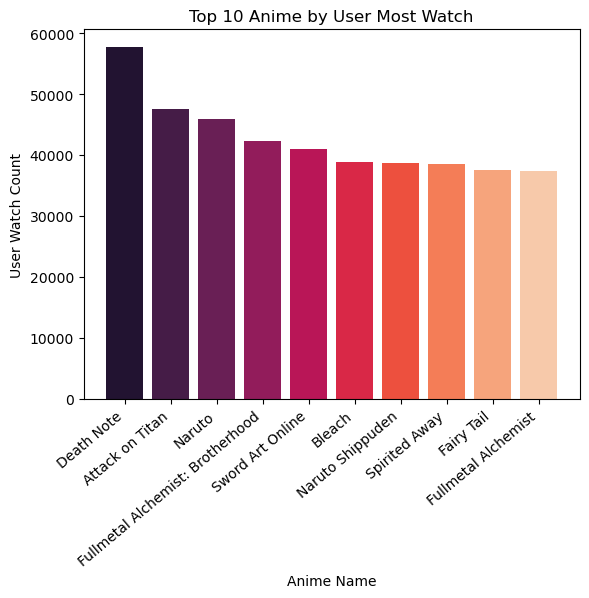

In [24]:
# Tampilkan grafik anime yang paling banyak dilihat
top_10_anime = anime_complete['name'].value_counts().nlargest(10)
palette = sns.color_palette('rocket', len(top_10_anime))

# Buat grafik
plt.bar(top_10_anime.index, top_10_anime.values, color=palette)

# Set judul dan label
plt.title('Top 10 Anime by User Most Watch')
plt.xlabel('Anime Name')
plt.ylabel('User Watch Count')
plt.xticks(rotation=40, ha="right")

# Tampilkan plot
plt.show()

In [25]:
# copy nilai ke variabel baru
anime_features = anime_complete.copy()
anime_features.head()

,anime_id,name,rating_score,tags,user_id,rating
0,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",7,0.0
1,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",8,3.5
2,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",22,0.0
3,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",34,4.0
4,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",37,3.0


In [26]:
# bersihkan teks
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

In [27]:
# Terapkan pembersihan teks
anime_features['name'] = anime_features['name'].apply(text_cleaning)

In [28]:
anime_features

,anime_id,name,rating_score,tags,user_id,rating
0,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",7,0.0
1,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",8,3.5
2,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",22,0.0
3,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",34,4.0
4,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",37,3.0
...,...,...,...,...,...,...
20840688,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,2.462,"Drama, Promotional",70500,0.0
20840689,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,2.462,"Drama, Promotional",70660,0.0
20840690,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,2.462,"Drama, Promotional",73216,3.0
20840691,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,2.462,"Drama, Promotional",74265,1.0


In [29]:
# cek missing value
anime_features.isnull().sum()

anime_id        0
name            0
rating_score    0
tags            0
user_id         0
rating          0
dtype: int64

In [30]:
# Membuat variabel preparation yang berisi dataframe anime_features kemudian mengurutkan berdasarkan anime_id
preparation = anime_features
preparation.sort_values('anime_id', ascending=True)

,anime_id,name,rating_score,tags,user_id,rating
5682756,2,Vandread,3.836,"Comedy, Mecha, Sci Fi, Outer Space, Original Work",64775,3.0
5681821,2,Vandread,3.836,"Comedy, Mecha, Sci Fi, Outer Space, Original Work",50851,4.0
5681822,2,Vandread,3.836,"Comedy, Mecha, Sci Fi, Outer Space, Original Work",50852,2.0
5681823,2,Vandread,3.836,"Comedy, Mecha, Sci Fi, Outer Space, Original Work",50854,3.5
5681824,2,Vandread,3.836,"Comedy, Mecha, Sci Fi, Outer Space, Original Work",50856,5.0
...,...,...,...,...,...,...
4959772,17231,Allegseuui Moheom,Unknown,"Fantasy, Family Friendly, Korean Animation",51418,0.0
4959773,17231,Allegseuui Moheom,Unknown,"Fantasy, Family Friendly, Korean Animation",52542,0.0
4959774,17231,Allegseuui Moheom,Unknown,"Fantasy, Family Friendly, Korean Animation",56411,0.0
4959775,17231,Allegseuui Moheom,Unknown,"Fantasy, Family Friendly, Korean Animation",70500,0.0


In [31]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('anime_id')
preparation

,anime_id,name,rating_score,tags,user_id,rating
0,10,The Prince of Tennis,4.037,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",7,0.0
7352,100,Neon Genesis Evangelion,4.248,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...",5,0.0
32566,1000,Full Metal Panic! The Second Raid,4.35,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...",1,3.5
42770,10000,22/7: Shampoo no Nioi ga Shita,2.8,"Idols, School Life, CG Animation",68,0.0
42936,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,1.271,Family Friendly,1635,0.0
...,...,...,...,...,...,...
20839914,9995,Kitsunetsuki: Kedamonodamono,2.32,Demons,1001,3.0
20840035,9996,Irodorimidori: Outsider Requiem,2.277,"Idols, Music",1635,0.0
20840132,9997,Kura Sushi,3.087,"Coworkers, Food and Beverage, Promotional, Res...",1635,0.0
20840214,9998,High School Fleet Movie,3.912,"Action, Military, Military School, Ocean, Scho...",188,0.0


In [32]:
data = preparation
data.sample(5)

,anime_id,name,rating_score,tags,user_id,rating
12371969,5130,Tsuki wa Higashi ni Hi wa Nishi ni: Operation ...,2.178,Based on a Visual Novel,1635,0.0
3706819,14531,IDOLiSH7: Crescent Rise,3.598,Idols,729,0.0
298955,10216,Yu Bang Xiang Zheng,2.301,"Animal Protagonists, Chinese Animation, Family...",1196,0.0
401138,10334,The Frog Kingdom,1.562,"Sports, Animal Protagonists, Anthropomorphic, ...",1635,0.0
437790,10450,ALT: A Play,1.584,Abstract,1635,0.0


### Preparation - Content Based Filtering

In [33]:
# replace tanda koma dengan spasi
tags_combined = data['tags'].str.replace(',', ' ')
tags_combined

0           Comedy  Drama  Shounen  Sports  Tennis  Based ...
7352        Drama  Mecha  Sci Fi  Conspiracy  Kaijuu  Lone...
32566       Action  Comedy  Mecha  Sci Fi  Shounen  Milita...
42770                        Idols  School Life  CG Animation
42936                                         Family Friendly
                                  ...                        
20839914                                               Demons
20840035                                         Idols  Music
20840132    Coworkers  Food and Beverage  Promotional  Res...
20840214    Action  Military  Military School  Ocean  Scho...
20840616                                   Drama  Promotional
Name: tags, Length: 16621, dtype: object

### Preparation - Collaborative Filtering

In [34]:
# seleksi fitur
data_cbf = data.drop(['rating_score', 'tags'], axis=1)
data_cbf

,anime_id,name,user_id,rating
0,10,The Prince of Tennis,7,0.0
7352,100,Neon Genesis Evangelion,5,0.0
32566,1000,Full Metal Panic! The Second Raid,1,3.5
42770,10000,22/7: Shampoo no Nioi ga Shita,68,0.0
42936,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,1635,0.0
...,...,...,...,...
20839914,9995,Kitsunetsuki: Kedamonodamono,1001,3.0
20840035,9996,Irodorimidori: Outsider Requiem,1635,0.0
20840132,9997,Kura Sushi,1635,0.0
20840214,9998,High School Fleet Movie,188,0.0


In [35]:
# user harus sudah me-rate minimal 10 anime
n_ratings = data_cbf['user_id'].value_counts()
rating_df = data_cbf[data_cbf['user_id'].isin(n_ratings[n_ratings >= 10].index)].copy()
len(rating_df)

15762

In [36]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.10336568963329529


In [37]:
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


In [38]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = rating_df['user_id'].unique().tolist()

# Melakukan encoding userID
user2user_encoded  = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke user_id
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)


anime_ids = rating_df['anime_id'].unique().tolist()
anime2anime_encoded  = {x: i for i, x in enumerate(anime_ids)}
 
# Melakukan proses encoding angka ke anime_ids
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 133, Num of animes: 15762
Min rating: 0.0, Max rating: 1.0


In [39]:
rating_df = rating_df.sample(frac=1, random_state=39)

# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = rating_df[['user', 'anime']].values
     
# Membuat variabel y untuk membuat rating dari hasil 
y = rating_df['rating'].values
     
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * rating_df.shape[0])
x_train, x_test, y_train, y_test = (
      x[:train_indices],
      x[train_indices:],
      y[:train_indices],
      y[train_indices:]
  )
     
print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 12609
> Test set ratings: 3153


In [40]:
x_train_array = [x_train[:, 0], x_train[:, 1]]
x_test_array = [x_test[:, 0], x_test[:, 1]]
x_train_array

[array([ 3, 47, 55, ..., 40,  5, 28]),
 array([ 2702,  4453,  4833, ...,  9169,  3593, 12698])]

## Modeling and Result

### Content Based Filtering - Modelling

In [41]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()


tfidf_matrix = tf.fit_transform(tags_combined) 
     
# Mapping array dari fitur index integer ke fitur nama
tfidf_matrix.shape

(16621, 616)

In [42]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=data.name
).sample(50, axis=1).sample(10, axis=0)

,girlfriend,football,game,dogs,day,person,strong,martial,aliens,jungle,...,chinese,finland,desert,identifications,josei,combining,siblings,crossdressing,high,stakes
name,,,,,,,,,,,,,,,,,,,,,
B't X,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Meiji Tokyo Renka,0.0,0.0,0.227556,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Oshiruko,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Mai Zhu,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.291185,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Fafner Exodus 2nd Season,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.324064,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Pokemon: The Mastermind of Mirage Pokemon,0.0,0.0,0.291042,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Jiangnan,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.652622,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Lagrange: The Flower of Rin-ne - Season 2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.444417,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Ouran High School Host Club,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.31577,0.0,0.0


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.0466116 , 0.14367045, ..., 0.        , 0.        ,
        0.18767336],
       [0.0466116 , 1.        , 0.26561408, ..., 0.02807647, 0.18462736,
        0.09190499],
       [0.14367045, 0.26561408, 1.        , ..., 0.        , 0.21993891,
        0.        ],
       ...,
       [0.        , 0.02807647, 0.        , ..., 1.        , 0.07187223,
        0.22808514],
       [0.        , 0.18462736, 0.21993891, ..., 0.07187223, 1.        ,
        0.        ],
       [0.18767336, 0.09190499, 0.        , ..., 0.22808514, 0.        ,
        1.        ]])

In [45]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap anime
cosine_sim_df

Shape: (16621, 16621)


name,The Prince of Tennis,Neon Genesis Evangelion,Full Metal Panic! The Second Raid,22/7: Shampoo no Nioi ga Shita,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,BACK DROP BOMB: Sigh,MIRChee: Kyak Kyak Kyak Flamenco,Mang Huang Ji,sora tob sakana: Ribbon,Kindan no Tasuketsu: Nosferatu,...,Crystal Sky of Yesterday,Tamaki Roy: Koto no Shidai,22/7: Ano Hi no Kanojo-tachi,Kenshi Yonezu: Sajou no Yumekui Shoujo,Sangatsu no Phantasia: Cobalt World,Kitsunetsuki: Kedamonodamono,Irodorimidori: Outsider Requiem,Kura Sushi,High School Fleet Movie,Drive Agent Personal: Shiawase wo Mamoru Mono
name,,,,,,,,,,,,,,,,,,,,,
The Prince of Tennis,1.000000,0.046612,0.143670,0.000000,0.0,0.0,0.0,0.049717,0.0,0.0,...,0.083285,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.187673
Neon Genesis Evangelion,0.046612,1.000000,0.265614,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.040785,0.0,0.000000,0.0,0.0,0.0,0.000000,0.028076,0.184627,0.091905
Full Metal Panic! The Second Raid,0.143670,0.265614,1.000000,0.000000,0.0,0.0,0.0,0.122907,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.219939,0.000000
22/7: Shampoo no Nioi ga Shita,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.076533,0.0,0.0,...,0.298747,0.0,0.439422,0.0,0.0,0.0,0.426297,0.069993,0.247229,0.000000
Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kitsunetsuki: Kedamonodamono,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
Irodorimidori: Outsider Requiem,0.000000,0.000000,0.000000,0.426297,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.401547,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
Kura Sushi,0.000000,0.028076,0.000000,0.069993,0.0,0.0,0.0,0.097771,0.0,0.0,...,0.047914,0.0,0.219144,0.0,0.0,0.0,0.000000,1.000000,0.071872,0.228085


In [46]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['name', 'tags']], k=5):
        # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
        # Dataframe diubah menjadi numpy
        # Range(start, stop, step)
        index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
            range(-1, -k, -1))
        
        # Mengambil data dengan similarity terbesar dari index yang ada
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        
        # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
        closest = closest.drop(nama_anime, errors='ignore')
     
        return pd.DataFrame(closest).merge(items).head(k)

### Content Based Filtering - Result

In [47]:
# mendapatkan nama anime random
anime_title = np.random.choice(data.name)
anime_title
data[data.name.eq(anime_title)]

,anime_id,name,rating_score,tags,user_id,rating
20539265,979,Zipang,3.868,"Action, Adventure, Drama, Seinen, Historical, ...",22,0.0


In [48]:
anime_recommendations(anime_title)

,name,tags
0,Zero-sen Hayato,"Historical, Military, War, World War 2, Based ..."
1,Zero-sen Hayato Pilot,"Historical, Military, War, World War 2, Based ..."
2,The Prince and the White Horse,"Historical, Time Travel, War"
3,Konpeki no Kantai Tokubetsu-hen: Sourai Kaihat...,"Historical, Military, War, World War 2, Based ..."
4,Konpeki no Kantai,"Historical, Military, War, World War 2, Based ..."


### Collaborative Based Filtering - Modelling

In [49]:
# Embedding layers
import tensorflow as tf
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras.models import Model

def RecommenderNet(num_users, num_anime, embedding_size):
    
        user = Input(name = 'user', shape = [1])
        embedding_size = embedding_size
        
        user_embedding = Embedding( # layer embedding user
            name = 'user_embedding',
            input_dim = num_users, 
            output_dim = embedding_size,
        )(user)
        
        anime = Input(name = 'anime', shape = [1])
        anime_embedding = Embedding( # layer embeddings anime
            name = 'anime_embedding',
            input_dim = num_anime, 
            output_dim = embedding_size)(anime)
        
     
        x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
        x = Flatten()(x)

        x = Dense(1, kernel_initializer='he_normal')(x)
        x = BatchNormalization()(x)
        x = Activation("sigmoid")(x)
        
        model = Model(inputs=[user, anime], outputs=x)
 
        
        return model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [50]:
model = RecommenderNet(n_users, n_animes, 50) # inisialisasi model
     
# model compile
model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        6650        ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 50)        788100      ['anime[0][0]']                  
                                                                                              

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoints = ModelCheckpoint(filepath='./weights.h5',
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)


my_callbacks = [
    model_checkpoints,
]

In [52]:
# Memulai training

history = model.fit(
        x = x_train_array,
        y = y_train,
        batch_size = 8,
        epochs = 100,
        validation_data = (x_test_array, y_test),
        callbacks=my_callbacks,
    )

Epoch 1/100
1577/1577 [==============================] - 17s 7ms/step - loss: 0.5023 - root_mean_squared_error: 0.3405 - val_loss: 0.3770 - val_root_mean_squared_error: 0.2531
Epoch 2/100
1577/1577 [==============================] - 10s 6ms/step - loss: 0.3587 - root_mean_squared_error: 0.2394 - val_loss: 0.3244 - val_root_mean_squared_error: 0.2199
Epoch 3/100
1577/1577 [==============================] - 10s 6ms/step - loss: 0.3103 - root_mean_squared_error: 0.2114 - val_loss: 0.3285 - val_root_mean_squared_error: 0.2225
Epoch 4/100
1577/1577 [==============================] - 10s 6ms/step - loss: 0.2305 - root_mean_squared_error: 0.1587 - val_loss: 0.3319 - val_root_mean_squared_error: 0.2240
Epoch 5/100
1577/1577 [==============================] - 10s 6ms/step - loss: 0.1930 - root_mean_squared_error: 0.1243 - val_loss: 0.3368 - val_root_mean_squared_error: 0.2229
Epoch 6/100
1577/1577 [==============================] - 10s 6ms/step - loss: 0.1792 - root_mean_squared_error: 0.1106 -

In [53]:
model.load_weights('./weights.h5')

In [54]:
df_test = anime
df_test = df_test.replace("Unknown", np.nan)
df_test

,anime_planetid,name,alternative_name,rating_score,number_votes,tags,content_warning,type,episodes,finished,duration,startyear,endyear,season,studios,synopsis,url
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",NaN,TV,178,True,NaN,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,NaN,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,1000,Full Metal Panic! The Second Raid,NaN,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,NaN,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,10000,22/7: Shampoo no Nioi ga Shita,NaN,2.8,131,"Idols, School Life, CG Animation",NaN,Music,1,True,5,2018,2018,NaN,NaN,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,NaN,1.271,21,Family Friendly,NaN,Web,1,True,2,2017,2017,NaN,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,NaN,2.32,96,Demons,NaN,Music,1,True,4,2018,2018,NaN,NaN,The official music video for Killing Bites's e...,https://www.anime-planet.com/anime/kitsunetsuk...
16617,9996,Irodorimidori: Outsider Requiem,NaN,2.277,63,"Idols, Music",NaN,Music,1,True,2,2018,2018,NaN,NaN,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/irodorimido...
16618,9997,Kura Sushi,NaN,3.087,45,"Coworkers, Food and Beverage, Promotional, Res...",NaN,Web,2,True,4,2014,2016,NaN,NaN,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/kura-sushi
16619,9998,High School Fleet Movie,Haifuri Movie,3.912,148,"Action, Military, Military School, Ocean, Scho...",NaN,Movie,1,True,103,2020,2020,NaN,A-1 Pictures,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/high-school...


In [55]:
df_test.rename(columns = {'anime_planetid':'anime_id'}, inplace = True)

In [56]:
def get_recommendations(user_id, recom_n=5):    
    print("===" * 10)
    print("Recommendation for id: {}".format(user_id))
    print("===" * 10)

    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    anime_not_watched_df = df_test[
        ~df_test["anime_id"].isin(animes_watched_by_user.anime_id.values)
    ]

    anime_not_watched = list(
        set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
    )

    anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

    user_encoder = user2user_encoded.get(user_id)

    user_anime_array = np.hstack(
        ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
    )

    user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
    ratings = model.predict(user_anime_array).flatten()

    top_ratings_indices = (-ratings).argsort()[:recom_n]

    recommended_anime_ids = [
        anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
    ]

    Results = []
    top_rated_ids = []

    for index, anime_id in enumerate(anime_not_watched):
        rating = ratings[index]
        id_ = anime_encoded2anime.get(anime_id[0])

        if id_ in recommended_anime_ids:
            top_rated_ids.append(id_)
            try:
                condition = (df_test.anime_id == id_)
                name = df_test[condition]['name'].values[0]
                sypnopsis = df_test[condition].synopsis.values[0]
                tags = df_test[condition].tags.values[0]
            except:
                continue

            Results.append({#"anime_id": id_, 
                            "name": name, 
                            "pred_rating": rating,
                            "tags": tags,
                            'sypnopsis': sypnopsis} )


    print('>>>>>>>> Top ',recom_n,' anime recommendations for you <<<<<<<<<<<<')


    Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
    return Results

### Collaborative Based Filtering - Result

In [57]:
# mendapatkan user id random
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> user_id: 526


In [58]:
get_recommendations(random_user)

Recommendation for id: 526
492/492 [==============================] - 1s 2ms/step
>>>>>>>> Top  5  anime recommendations for you <<<<<<<<<<<<


,name,pred_rating,tags,sypnopsis
0,Sonic the Hedgehog: The Movie,0.145738,"Action, Sci Fi, Animal Protagonists, Anthropom...",Sonic and Tails are taking some much needed re...
1,Oasis: Falling Down,0.145710,Abstract,"In a hectic, commercial world full of skyscrap..."
4,"Welcome to Demon School, Iruma-kun 2",0.144790,"Comedy, Shounen, Demons, Monster School, Perso...","Second season of Welcome to Demon School, Irum..."
3,Free! Road to the World - Yume,0.144564,"Sports, Recap, School Club, Swimming, Based on...","When Haru and Makoto start college, they run i..."
2,eX-Driver the Movie Specials,0.144442,"Comedy, Short Episodes",No synopsis yet - check back soon!


## Evaluation

### Collaborative Based Filtering

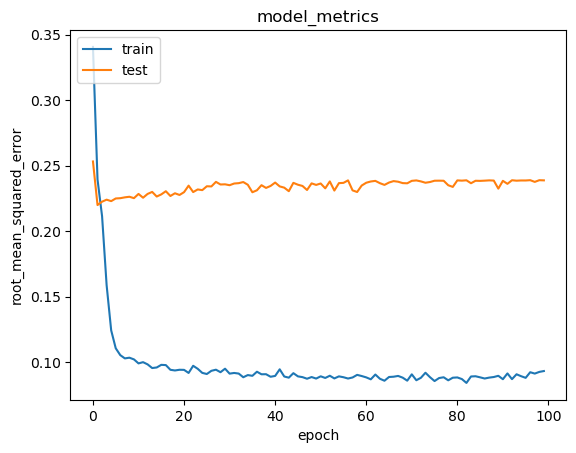

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()